# Multilayer Perceptron (MLP) for MNIST Dataset

In this notebook, we'll explore how to train a Multilayer Perceptron (MLP) on the popular MNIST dataset, which contains grayscale images of handwritten digits (0-9).

A MLP is one of the most basic types of neural networks that you will encounter. They operate in a feed-forward (FFNN) fashion, with no sort of recurrent operation present. They are oftentimes called "vanilla" neural networks, due to them being thought of as a default style of network. They are also often called dense neural networks, due to the fact that the neurons are commonly fully connected to each other between hidden layers.

Notebook inspired by [Generative Deep Learning: Teaching Machines to Paint, Write, Compose and Play](https://www.oreilly.com/library/view/generative-deep-learning/9781098134174/)

In [1]:
# PACKAGE IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

## Parameters

In [2]:
NUM_CLASSES = 10 # Constant; digits 0 - 9
BATCH_SIZE = 32 # size of mini-batch
NUM_EPOCHS = 10 # full passes through data


## 1. Prepare the Data

We will load the MNIST dataset, which contains 60,000 training images and 10,000 test images of handwritten digits. Each image is 28x28 pixels, and the task is to classify them into 10 classes (digits 0-9).


In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to have pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# -1 effectively tells Python to ignore batch dimension
# 28*28 is flattening the image into a 1D vector
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display train dat & label shape
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")

# Spacing
print()

# Display test dat & label shape
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (60000, 784)
Training labels shape: (60000, 10)

Test data shape: (10000, 784)
Test labels shape: (10000, 10)


In [4]:
# Set NumPy to print the entire array
np.set_printoptions(threshold=np.inf)

# Normalized pixel values
print('Normalized Pixel Values:')
print(x_train[:1])

print() # Spacing

# First entry label
print('Label for first entry:')
print(y_train[:1])

Normalized Pixel Values:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.


## 2. Build the Model
We will build a simple Multilayer Perceptron (MLP) model with the following architecture:
- Input layer: 784 (28x28) input neurons (one for each pixel in the MNIST image).
- Two hidden layers with ReLU activation.
- Output layer with 10 neurons (one for each class) using softmax activation.

Here's how we can define this model:


In [6]:
# Define the MLP model
model = Sequential([
    Input(shape = (28*28,)),
    # First hidden layer with 128 units
    Dense(128, activation='relu'),
    # Second hidden layer with 64 units
    Dense(64, activation='relu'),
    # Output layer with 10 classes (digits 0-9)
    Dense(10, activation='softmax')
])

# Compile the model with categorical crossentropy and an optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Train the model

In [7]:
# Set up optimizer for backpropogation
opt = optimizers.Adam(learning_rate=0.0005)

# Compile model - get it ready for training
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt, metrics=["accuracy"]
)

In [8]:
# Fit model
model.fit(x_train,
          y_train,
          batch_size=BATCH_SIZE, # batch size for each mini-batch of data
          epochs=NUM_EPOCHS, # 10 pass-throughs of the full data
          shuffle=True # Shuffle data for better training
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8483 - loss: 0.5366
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9620 - loss: 0.1321
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9744 - loss: 0.0856
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9802 - loss: 0.0649
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9848 - loss: 0.0481
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9889 - loss: 0.0378
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9903 - loss: 0.0311
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9921 - loss: 0.0251
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9945 - loss: 0.0186
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9944 - loss: 0.0178


## 4. Evaluation

In [9]:
# Do pass over test data and get test metrics
# loss & then accuracy
mod_eval = model.evaluate(x_test, y_test)

print(f'Categorical Cross-Entropy Loss: {mod_eval[0]}\nAccuracy: {mod_eval[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0931
Categorical Cross-Entropy Loss: 0.08521047234535217
Accuracy: 0.9772999882698059


In [10]:
# Array of class labels
CLASSES = np.array(
    [
        "0",
        "1",
        "2",
        "3",
        "4",
        "5",
        "6",
        "7",
        "8",
        "9",
    ]
)

# Get model preds
preds = model.predict(x_test)

# Get model class pred
preds_single = CLASSES[np.argmax(preds, axis=-1)]

# Get true label
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


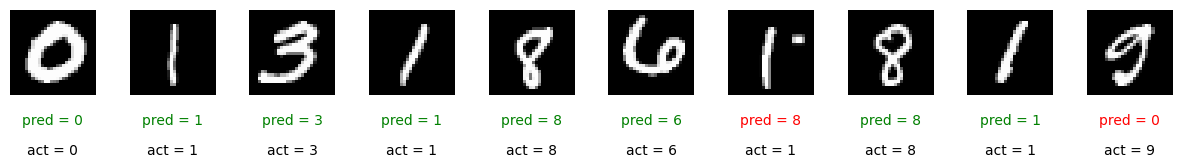

In [11]:
n_to_show = 10  # Number of images to show

# Get indices for values to show
indices = np.random.choice(range(len(x_test)), n_to_show)

# Set up plot space
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Enumerate through indices and plot each
for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28, 28)  # Reshape back to 28x28 for visualization

    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")

    # Determine color based on whether pred matches act
    color = "green" if preds_single[idx] == actual_single[idx] else "red"

    # Add text for prediction with color based on match
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
        color=color  # Set color based on prediction correctness
    )

    # Add text for actual value
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes
    )

    # Display the image
    ax.imshow(img, cmap='gray')

plt.show()

In [12]:
# VALIDATING color coding

indices = np.random.choice(range(len(x_test)), 10_000)

green = 0
red = 0

# Enumerate through test data and compare
for i in range(len(x_test)):
    # Determine color based on whether pred matches act
    color = "green" if preds_single[i] == actual_single[i] else "red"

    if color == 'green':
      green += 1
    else:
      red += 1

print('Green total:', green)
print('Red total:', red)
print('Total in test set:', len(x_test))

Green total: 9773
Red total: 227
Total in test set: 10000
